In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [ ]:
training_red = pd.read_csv('/content/drive/MyDrive/Dataset/winequality-red.csv', delimiter=';')
training_white = pd.read_csv('/content/drive/MyDrive/Dataset/winequality-white.csv', delimiter=';')

In [ ]:
training_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
training_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
training_red.info()
print('_'*50)
training_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
D

In [ ]:
columns_red = training_red.columns
columns_white = training_white.columns
print(columns_red)
print(columns_white)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
columns_red_plt = columns_red[:-1]
columns_white_plt = columns_white[:-1]
print(columns_red_plt)
print(columns_white_plt)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [ ]:
def plot_data(training_data):
  columns_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
  for i in range(0, len(columns_names)):     
    fig = plt.figure(figsize=(10,6))
    sns.barplot(x='quality', y=columns_names[i], data = training_data)

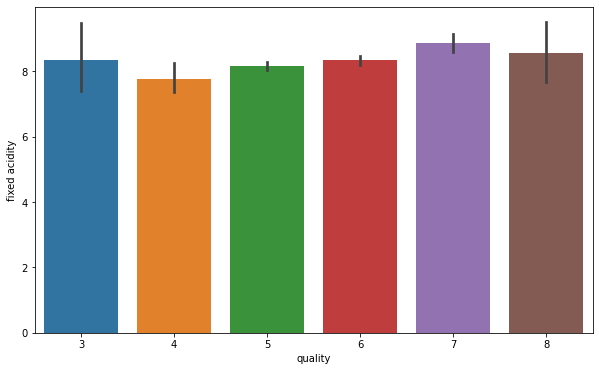

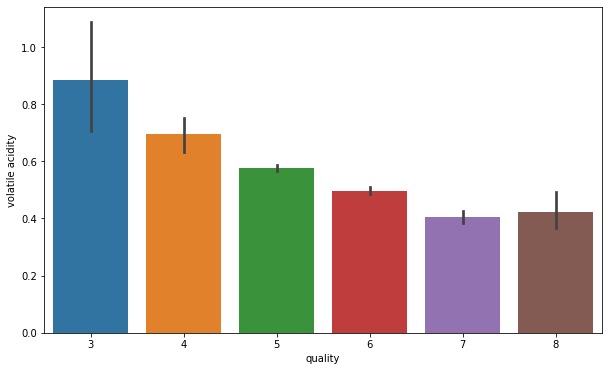

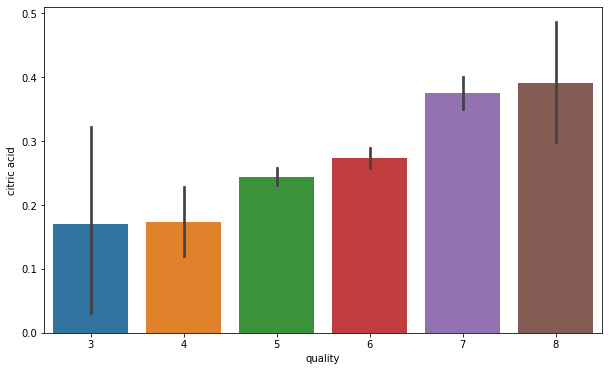

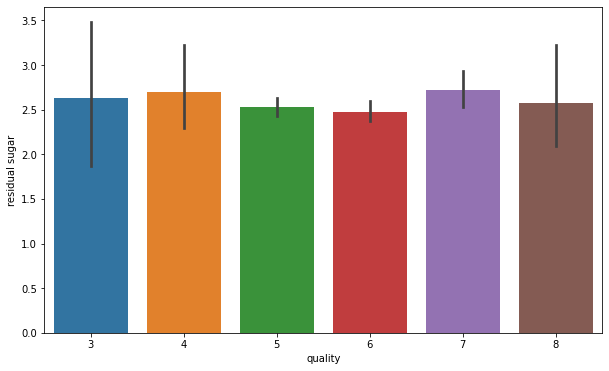

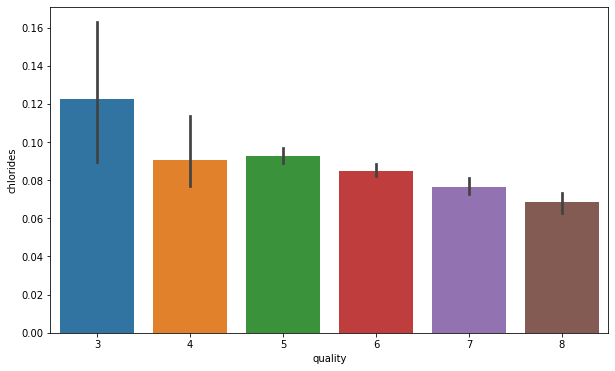

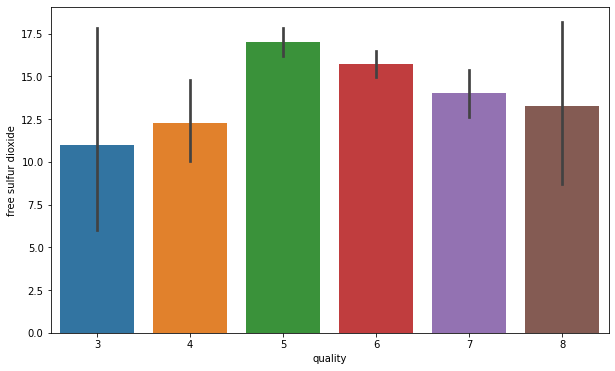

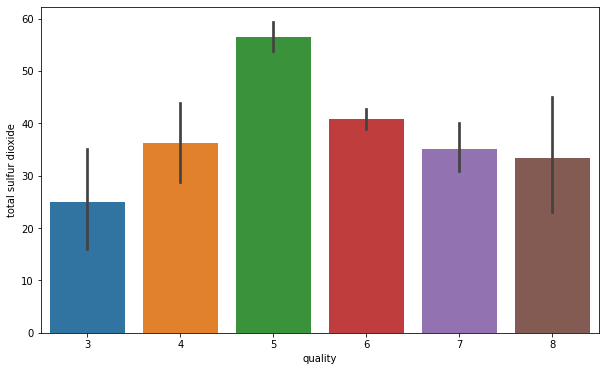

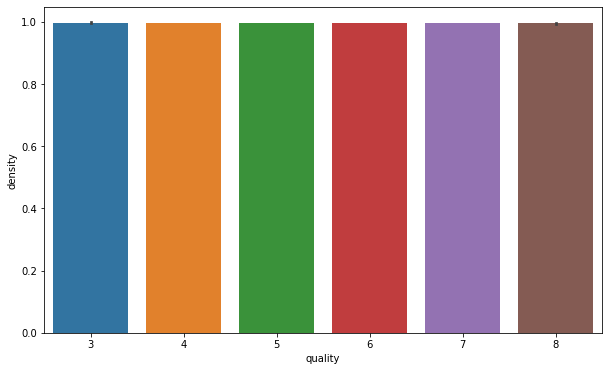

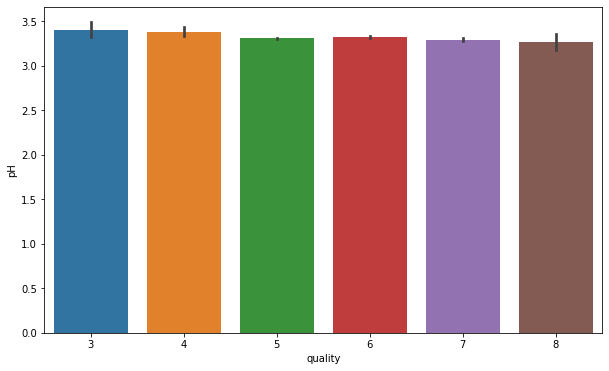

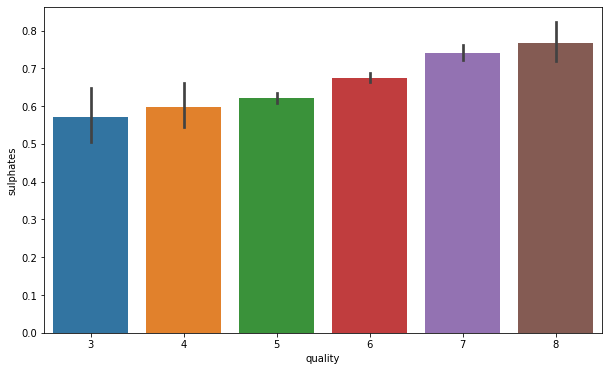

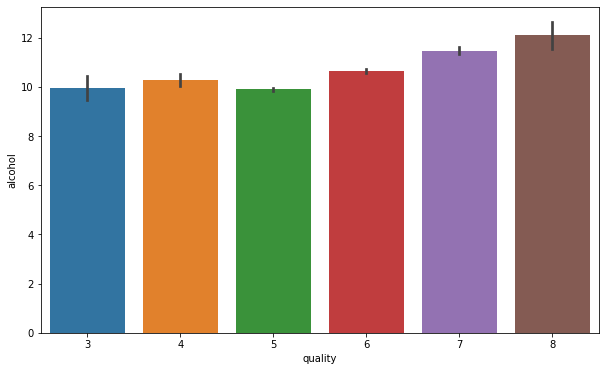

In [ ]:
plot_data(training_red)

In [ ]:
#RED WINE
#From the above graphs: quality vs fixed acidity --> It doesn't give any specification to classify the quality.
#volatile acidity decreases as the quality increases
#citric acid concentration increases as the quality increases
#quality vs residual sugar--> Doesn't give any specification
#chloride concentration decreases as the quality increases
#free sulphates doesn't show any specification
#sulphates concentration increases as the quality increases
#alcohol increases as the quality increases

In [ ]:
#Red wine
train = training_red.drop('quality', axis=1)
labels = training_red['quality']

In [ ]:
label_mod = []
for i in labels:
  if(i>6.5):
    label_mod.append(1)
  else:
    label_mod.append(0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train, label_mod, test_size=0.25, random_state=42)

In [ ]:
scale =StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
svc = SVC(gamma='auto')
nb = GaussianNB()  

In [ ]:
def models(x_train, y_train):
  knn.fit(x_train, y_train)
  svc.fit(x_train, y_train)
  nb.fit(x_train, y_train)

In [ ]:
models(x_train, y_train)

In [ ]:
def prediction_acc(x_test, y_test):
  prediction = []
  knn_pred = knn.predict(x_test)
  prediction.append(knn_pred)
  svc_pred = svc.predict(x_test)
  prediction.append(svc_pred)
  nb_pred = nb.predict(x_test)
  prediction.append(nb_pred)
  print("Accuracy using KNN: ",accuracy_score(y_test, knn_pred)*100,"%")
  print("Accuracy using Support Vector Classifier: ",accuracy_score(y_test, svc_pred)*100,"%")
  print("Accuracy using Naive Bayes: ",accuracy_score(y_test, nb_pred)*100,"%")
  return prediction

In [ ]:
pred = prediction_acc(x_test, y_test)

Accuracy using KNN:  86.5 %
Accuracy using Support Vector Classifier:  88.75 %
Accuracy using Naive Bayes:  84.75 %


Accuracy using KNN:  86.5 %


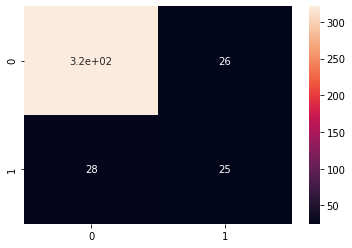

In [ ]:
print("Accuracy using KNN:  86.5 %")
con_mat = confusion_matrix(y_test, pred[0])
sns.heatmap(con_mat, annot=True)

Accuracy using Support Vector Classifier:  88.75 %


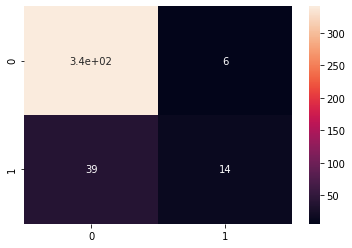

In [ ]:
print("Accuracy using Support Vector Classifier:  88.75 %")
con_mat = confusion_matrix(y_test, pred[1])
sns.heatmap(con_mat, annot=True)

Accuracy using Naive Bayes:  84.5 %


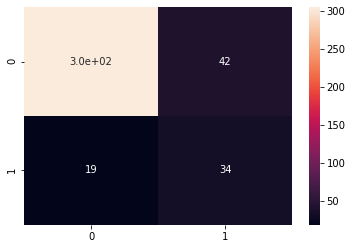

In [ ]:
print("Accuracy using Naive Bayes:  84.5 %")
con_mat = confusion_matrix(y_test, pred[2])
sns.heatmap(con_mat, annot=True)

In [ ]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid_svc.best_params_)
print('_'*70)
print(grid_svc.best_estimator_)

{'C': 1.3, 'gamma': 0.8, 'kernel': 'rbf'}
______________________________________________________________________
SVC(C=1.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
SVC_model = grid_svc.best_estimator_
SVC_model.fit(x_train, y_train)

SVC(C=1.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = SVC_model.predict(x_test)

In [ ]:
print("Accuracy of Support Vector Classifier after hyper-parameter tuning using Grid Search: ",accuracy_score(y_test, y_pred)*100,"%")

Accuracy of Support Vector Classifier after hyper-parameter tuning using Grid Search:  91.0 %


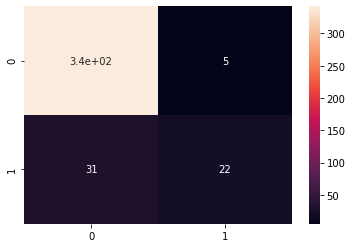

In [ ]:
svc_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_confusion, annot=True)

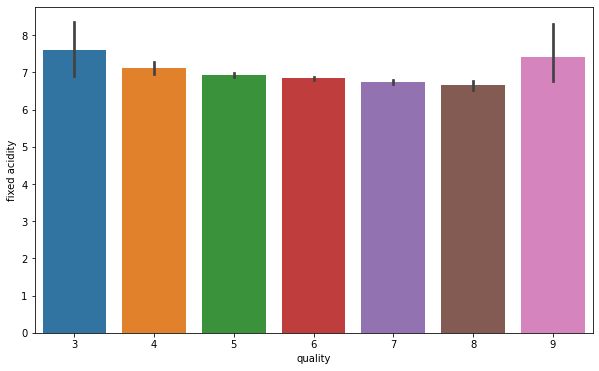

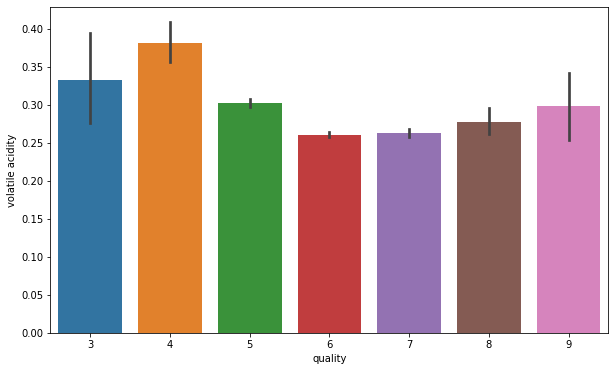

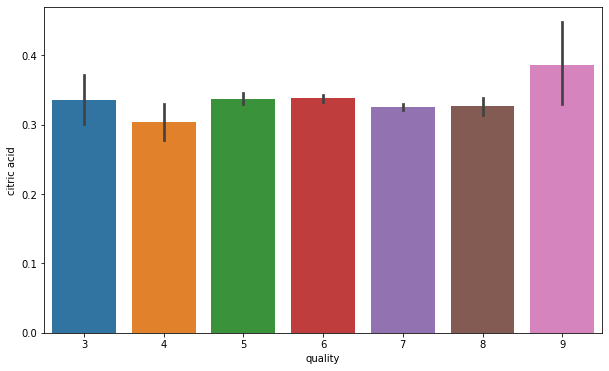

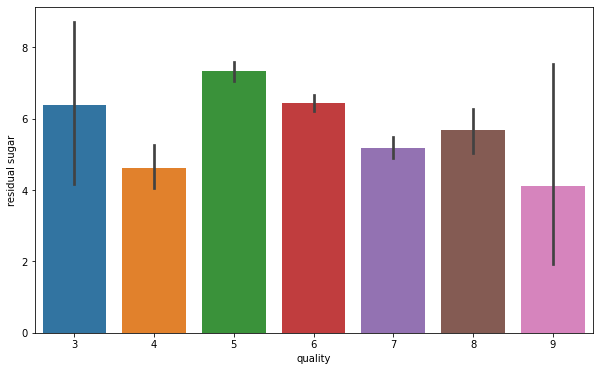

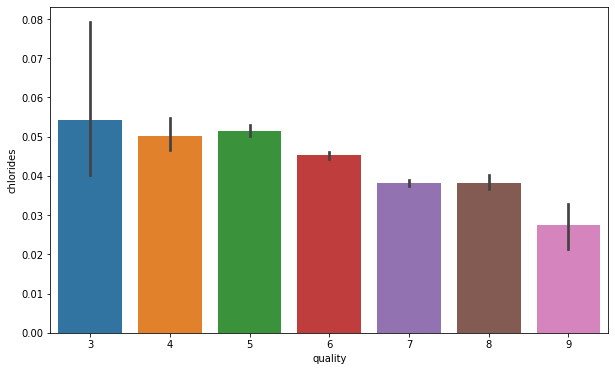

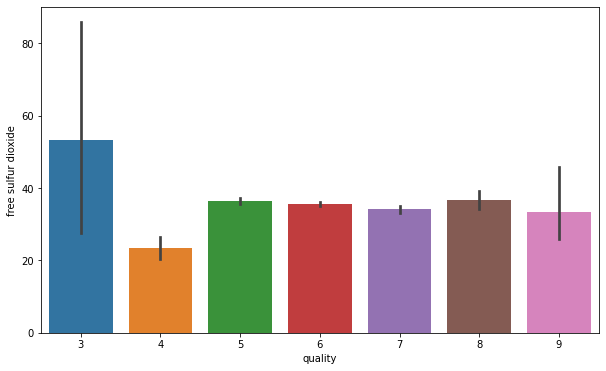

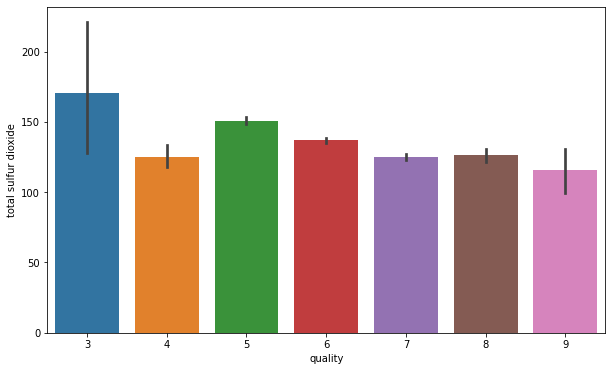

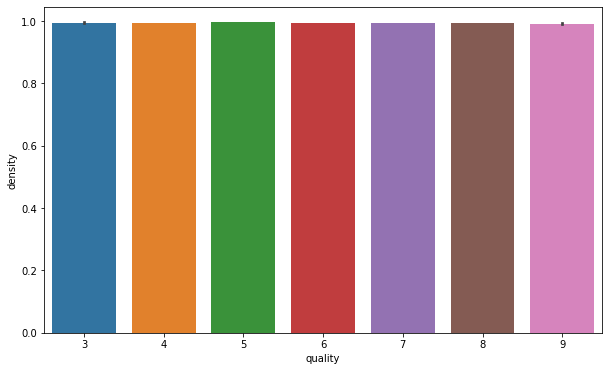

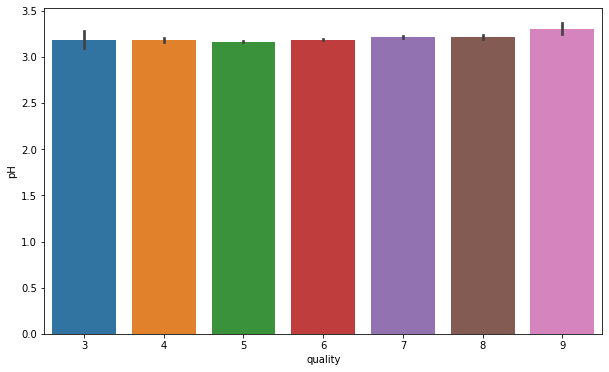

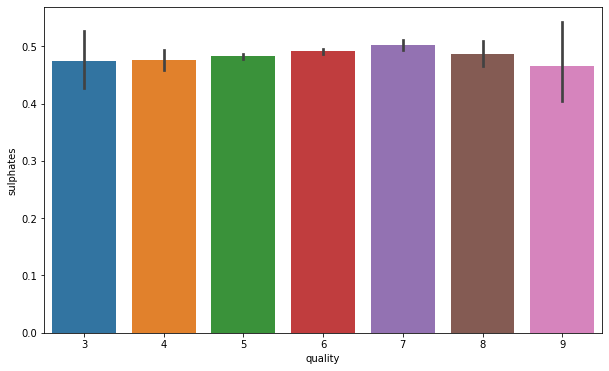

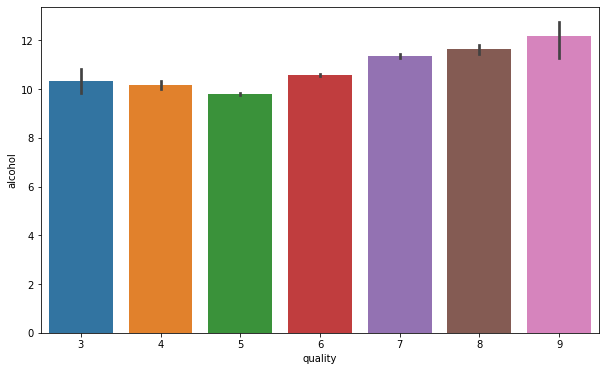

In [ ]:
#White wine
plot_data(training_white)

In [ ]:
train_white = training_white.drop('quality', axis=1)
labels_white = training_white['quality']

In [ ]:
label_mod1 = []
for i in labels_white:
  if(i>6.5):
    label_mod1.append(1)
  else:
    label_mod1.append(0)

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(train_white, label_mod1, test_size=0.25, random_state=42)

In [ ]:
x_train1 = scale.fit_transform(x_train1)
x_test1 = scale.fit_transform(x_test1)

In [ ]:
models(x_train1, y_train1)
pred1 = prediction_acc(x_test1, y_test1)

Accuracy using KNN:  84.0 %
Accuracy using Support Vector Classifier:  81.87755102040816 %
Accuracy using Naive Bayes:  71.34693877551021 %


Accuracy using KNN:  84.0 %


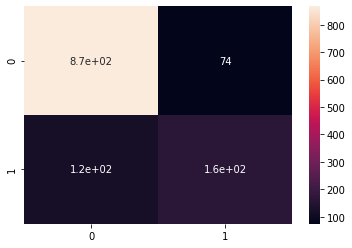

In [ ]:
print("Accuracy using KNN:  84.0 %")
con_mat = confusion_matrix(y_test1, pred1[0])
sns.heatmap(con_mat, annot=True)

Accuracy using Support Vector Classifier:  81.87 %


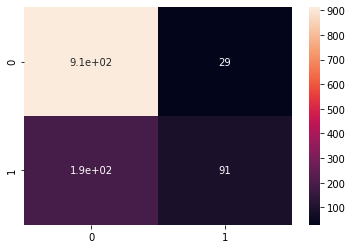

In [ ]:
print("Accuracy using Support Vector Classifier:  81.87 %")
con_mat = confusion_matrix(y_test1, pred1[1])
sns.heatmap(con_mat, annot=True)

Accuracy using Naive Bayes:  71.34 %


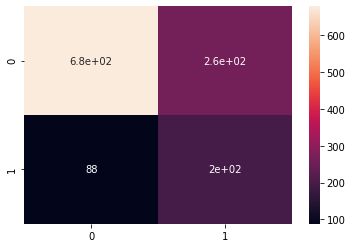

In [ ]:
print("Accuracy using Naive Bayes:  71.34 %")
con_mat = confusion_matrix(y_test1, pred1[2])
sns.heatmap(con_mat, annot=True)

In [ ]:
grid_svc1 = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc1.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid_svc.best_params_)
print('_'*70)
print(grid_svc.best_estimator_)

{'C': 1.3, 'gamma': 0.8, 'kernel': 'rbf'}
______________________________________________________________________
SVC(C=1.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
SVC_model = grid_svc.best_estimator_
SVC_model.fit(x_train1, y_train1)

SVC(C=1.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = SVC_model.predict(x_test)

In [ ]:
print("Accuracy of Support Vector Classifier after hyper-parameter tuning using Grid Search: ",accuracy_score(y_test, y_pred)*100,"%")

Accuracy of Support Vector Classifier after hyper-parameter tuning using Grid Search:  85.0 %


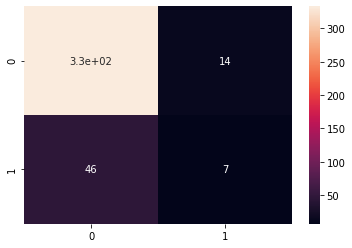

In [ ]:
svc_confusion1 = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_confusion1, annot=True)